https://scikit-network.readthedocs.io/en/latest/tutorials/ranking/index.html

In [2]:
from IPython.display import SVG
import numpy as np
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import PageRank
from sknetwork.visualization import visualize_graph, visualize_bigraph

In [3]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position


In [4]:
# PageRank
pagerank = PageRank()
scores = pagerank.fit_predict(adjacency)

In [5]:
image = visualize_graph(adjacency, position, scores=np.log(scores))
SVG(image)

https://networkx.org/documentation/stable/tutorial.html

Page rank value: {'A': 0.4080745143467559, 'B': 0.07967426232810562, 'C': 0.13704946318948705, 'D': 0.13704946318948705, 'E': 0.021428571428571432, 'F': 0.07967426232810562, 'G': 0.13704946318948705}


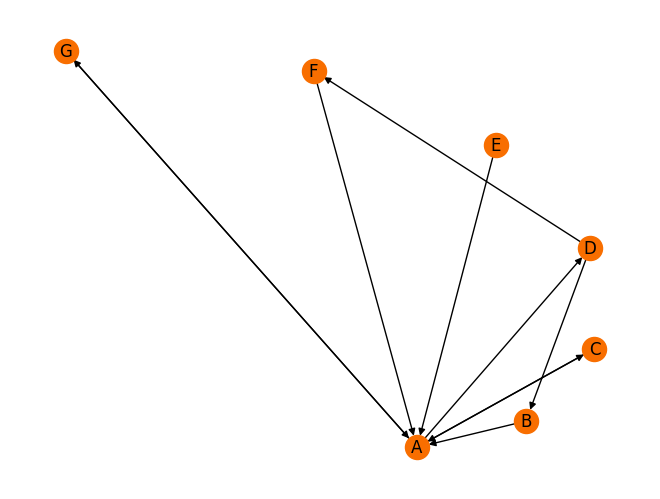

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

[G.add_node(k) for k in ["A", "B", "C", "D", "E", "F", "G"]]

G.add_edges_from([('G','A'), ('A','G'),('B','A'),
                  ('C','A'),('A','C'),('A','D'),
                  ('E','A'),('F','A'),('D','B'),
                  ('D','F')])
ppr1 = nx.pagerank(G)

print(f"Page rank value: { ppr1}")
pos = nx.spiral_layout(G)
nx.draw(G, pos, with_labels = True, node_color="#f86e00")
plt.show()

In [ ]:
! pip install pyspark

In [6]:
# from graphframes import *
import networkx as nx
from pyvis.network import Network
from IPython.display import HTML

import pandas as pd

# Create a Pandas DataFrame
edges = pd.DataFrame([
    ("ID1", "ID3"),
    ("ID1", "ID5"),
    ("ID2", "ID1"),
    ("ID2", "ID3"),
    ("ID2", "ID4"),
    ("ID2", "ID5"),
    ("ID3", "ID2"),
    ("ID4", "ID3"),
    ("ID5", "ID2"),
    ("ID5", "ID3")
], columns=["src", "dst"])

# Display the DataFrame
print(edges)


   src  dst
0  ID1  ID3
1  ID1  ID5
2  ID2  ID1
3  ID2  ID3
4  ID2  ID4
5  ID2  ID5
6  ID3  ID2
7  ID4  ID3
8  ID5  ID2
9  ID5  ID3


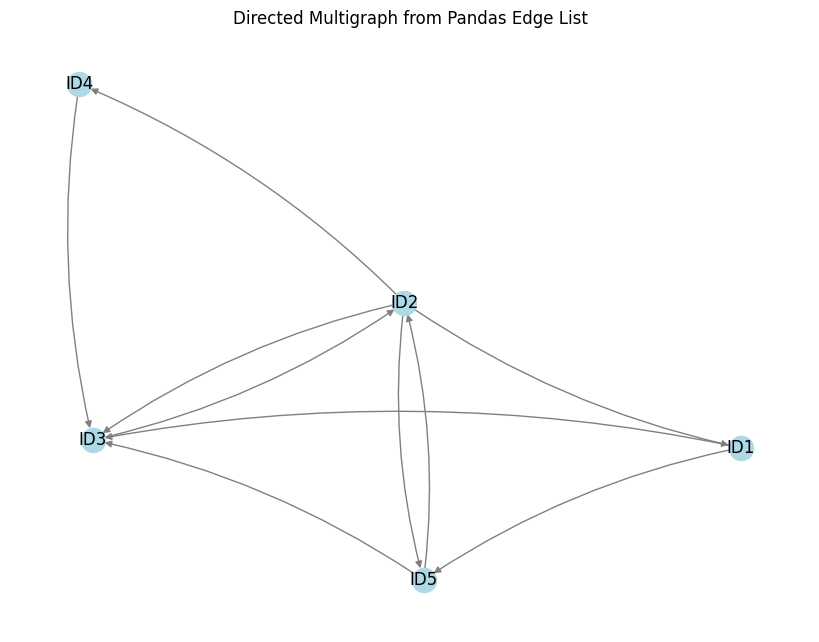

In [9]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Define your edge list using Pandas
edges = pd.DataFrame([
    ("ID1", "ID3"),
    ("ID1", "ID5"),
    ("ID2", "ID1"),
    ("ID2", "ID3"),
    ("ID2", "ID4"),
    ("ID2", "ID5"),
    ("ID3", "ID2"),
    ("ID4", "ID3"),
    ("ID5", "ID2"),
    ("ID5", "ID3")
], columns=["src", "dst"])

# Step 2: Create a MultiDiGraph using NetworkX
G = nx.MultiDiGraph()
G.add_edges_from(edges.itertuples(index=False, name=None))  # Add edges directly

# Step 3: Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, connectionstyle='arc3, rad = 0.1', node_color='lightblue', edge_color='gray')
plt.title("Directed Multigraph from Pandas Edge List")
plt.show()


In [18]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
from IPython.display import display, HTML

#Not: jupyter de randerlamıyor html kaydedip bak

# 1. Create edges DataFrame
edges = pd.DataFrame([
    ("ID1", "ID3"),
    ("ID1", "ID5"),
    ("ID2", "ID1"),
    ("ID2", "ID3"),
    ("ID2", "ID4"),
    ("ID2", "ID5"),
    ("ID3", "ID2"),
    ("ID4", "ID3"),
    ("ID5", "ID2"),
    ("ID5", "ID3")
], columns=["src", "dst"])

# 2. Create a MultiDiGraph and add edges
G = nx.MultiDiGraph()
G.add_edges_from(edges.itertuples(index=False, name=None))

# 3. Use pyvis to visualize
nt = Network(notebook=True, directed=True, cdn_resources='remote')
nt.from_nx(G)  # Load the NetworkX graph
nt.show_buttons(filter_=['physics'])  # Optional: show physics controls
nt.show("graph.html")  # Saves and displays in Jupyter notebook


graph.html


# pagerank mac deneme

In [19]:
import networkx as nx

# Create a directed graph
G = nx.DiGraph()

# Add weighted pass edges (From, To, Weight)
passes = [
    ('A', 'B', 5),
    ('A', 'C', 2),
    ('B', 'C', 3),
    ('B', 'D', 1),
    ('C', 'A', 4),
    ('D', 'B', 1)
]

G.add_weighted_edges_from(passes)

# Compute weighted PageRank
pagerank_scores = nx.pagerank(G, alpha=0.85, weight='weight')

# Print results
for player, score in pagerank_scores.items():
    print(f"Player {player}: PageRank = {score:.4f}")


Player A: PageRank = 0.2940
Player B: PageRank = 0.3025
Player C: PageRank = 0.3017
Player D: PageRank = 0.1018


In [31]:
from statsbombpy import sb
import pandas as pd

# Retrieve list of available competitions
competitions = sb.competitions()
print(competitions[['competition_id', 'season_id', 'competition_name', 'season_name']])

# Select a specific competition and season
# For example, FIFA World Cup 2018
competition_id = 43
season_id = 3

# Retrieve matches for the selected competition and season
matches = sb.matches(competition_id=competition_id, season_id=season_id)
print(matches[['match_id', 'home_team', 'away_team', 'match_date']])

# Select a specific match by match_id
# For example, the final match: France vs Croatia
match_id = 8658

# Retrieve event data for the selected match
events = sb.events(match_id=match_id)

import networkx as nx

# Filter for completed pass events
passes = events[(events['type'] == 'Pass') & (events['pass_outcome'].isnull())]

# Initialize a directed graph
G = nx.DiGraph()

# Iterate through pass events to build the graph
for _, row in passes.iterrows():
    passer = row['player']
    recipient = row['pass_recipient'] if pd.notnull(row['pass_recipient']) else None
    if recipient:
        if G.has_edge(passer, recipient):
            G[passer][recipient]['weight'] += 1
        else:
            G.add_edge(passer, recipient, weight=1)



    competition_id  season_id        competition_name season_name
0                9        281           1. Bundesliga   2023/2024
1                9         27           1. Bundesliga   2015/2016
2             1267        107  African Cup of Nations        2023
3               16          4        Champions League   2018/2019
4               16          1        Champions League   2017/2018
..             ...        ...                     ...         ...
69              55         43               UEFA Euro        2020
70              35         75      UEFA Europa League   1988/1989
71              53        106       UEFA Women's Euro        2022
72              72        107       Women's World Cup        2023
73              72         30       Women's World Cup        2019

[74 rows x 4 columns]
    match_id     home_team    away_team  match_date
0       7585      Colombia      England  2018-07-03
1       7570       England      Belgium  2018-06-28
2       7586        Sweden  S

d:\repos\FootballAnalysisPageRank\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
d:\repos\FootballAnalysisPageRank\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(
d:\repos\FootballAnalysisPageRank\venv\Lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


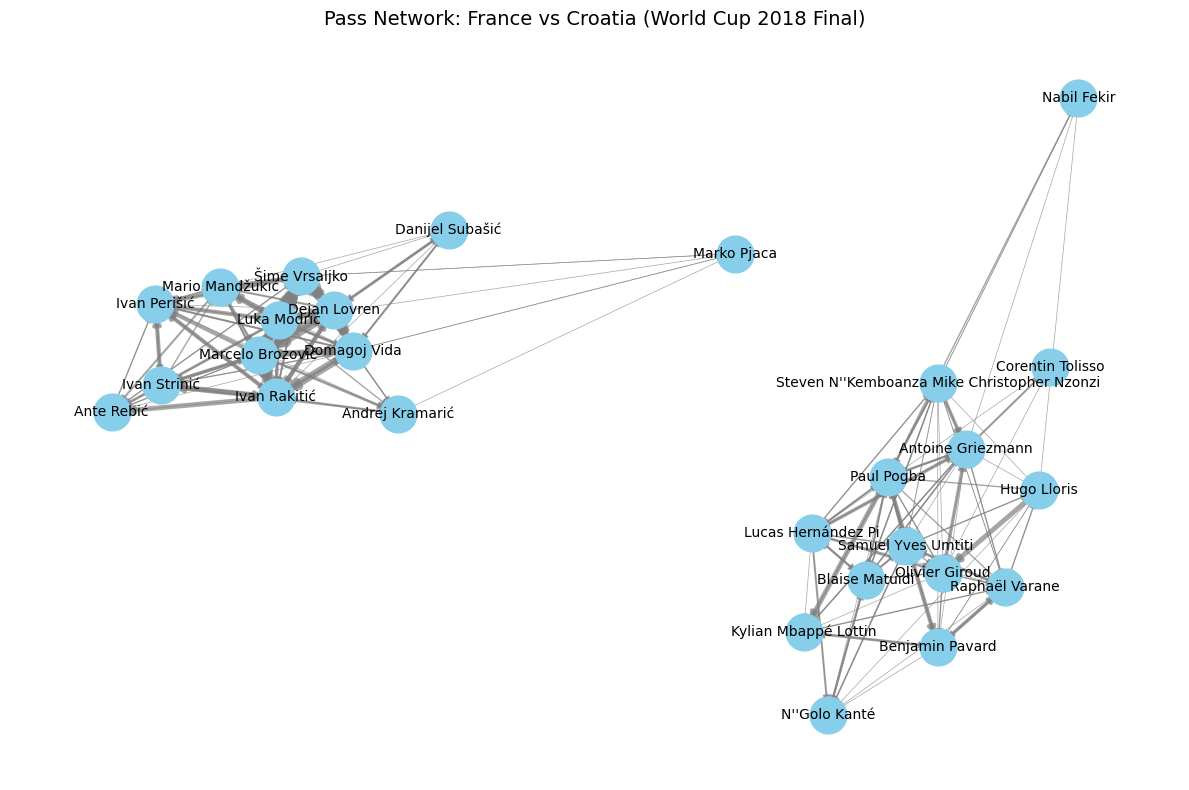

In [32]:
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(12, 8))

# Compute positions for nodes using a layout
pos = nx.spring_layout(G, k=0.8, seed=42)  # spring layout for clarity

# Draw nodes and labels
nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=700)
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edges with width based on pass count
edges = G.edges(data=True)
nx.draw_networkx_edges(
    G, pos,
    edgelist=edges,
    width=[data['weight'] * 0.5 for _, _, data in edges],
    alpha=0.7,
    edge_color='gray',
    arrows=True
)

# Add title
plt.title('Pass Network: France vs Croatia (World Cup 2018 Final)', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()


In [30]:
passes['pass_recipient']

6      Marcelo Brozović
7           Luka Modrić
8         Šime Vrsaljko
9       Danijel Subašić
12         Ivan Rakitić
             ...       
841        Ivan Perišić
843        Ivan Rakitić
844    Marcelo Brozović
848        Ivan Rakitić
849        Ivan Perišić
Name: pass_recipient, Length: 650, dtype: object

pageranklerin weight olayını ıncele

https://chatgpt.com/c/6817e861-fbec-800d-ab32-0200c4a5db23

In [35]:
edges

OutEdgeDataView([('Mario Mandžukić', 'Marcelo Brozović', {'weight': 4}), ('Mario Mandžukić', 'Ante Rebić', {'weight': 3}), ('Mario Mandžukić', 'Ivan Rakitić', {'weight': 3}), ('Mario Mandžukić', 'Ivan Perišić', {'weight': 3}), ('Mario Mandžukić', 'Dejan Lovren', {'weight': 1}), ('Mario Mandžukić', 'Luka Modrić', {'weight': 4}), ('Mario Mandžukić', 'Šime Vrsaljko', {'weight': 3}), ('Marcelo Brozović', 'Luka Modrić', {'weight': 20}), ('Marcelo Brozović', 'Ivan Perišić', {'weight': 6}), ('Marcelo Brozović', 'Ivan Strinić', {'weight': 5}), ('Marcelo Brozović', 'Domagoj Vida', {'weight': 9}), ('Marcelo Brozović', 'Ivan Rakitić', {'weight': 20}), ('Marcelo Brozović', 'Dejan Lovren', {'weight': 7}), ('Marcelo Brozović', 'Šime Vrsaljko', {'weight': 13}), ('Marcelo Brozović', 'Ante Rebić', {'weight': 2}), ('Marcelo Brozović', 'Mario Mandžukić', {'weight': 1}), ('Marcelo Brozović', 'Andrej Kramarić', {'weight': 4}), ('Luka Modrić', 'Šime Vrsaljko', {'weight': 17}), ('Luka Modrić', 'Domagoj Vida'

In [43]:
p = passes[['player','pass_recipient','pass_end_location']]
p[(p['player']=='Mario Mandžukić')& (p['pass_recipient']=='Marcelo Brozović') ]

,player,pass_recipient,pass_end_location
6,Mario Mandžukić,Marcelo Brozović,"[50.0, 42.0]"
147,Mario Mandžukić,Marcelo Brozović,"[52.0, 42.0]"
202,Mario Mandžukić,Marcelo Brozović,"[50.0, 41.0]"
529,Mario Mandžukić,Marcelo Brozović,"[50.0, 40.0]"


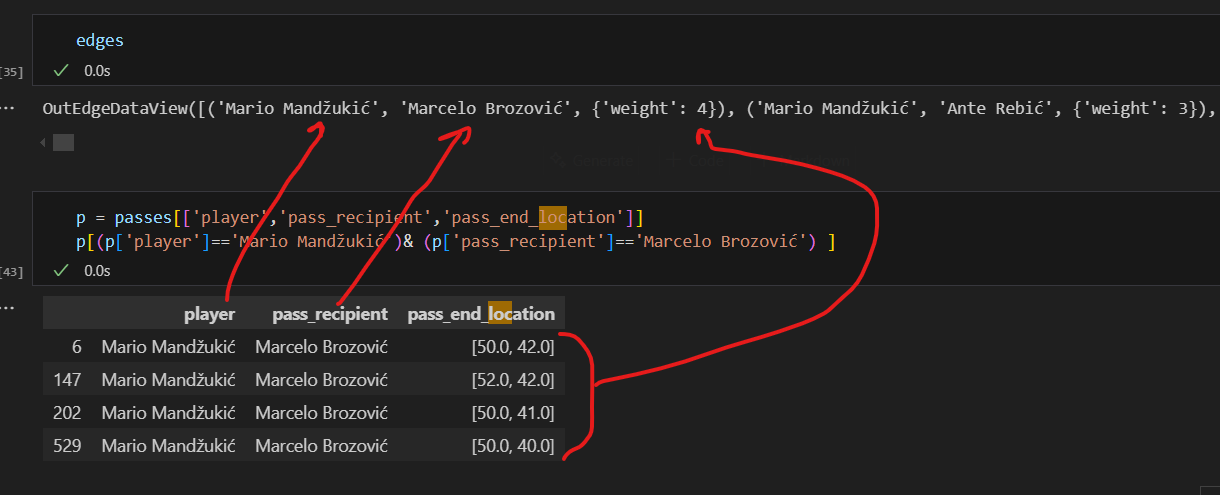

her pas yazılmıs 